In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [10]:
df = pd.read_csv("winequality-red.csv")

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
correlation_matrix = df.corr()

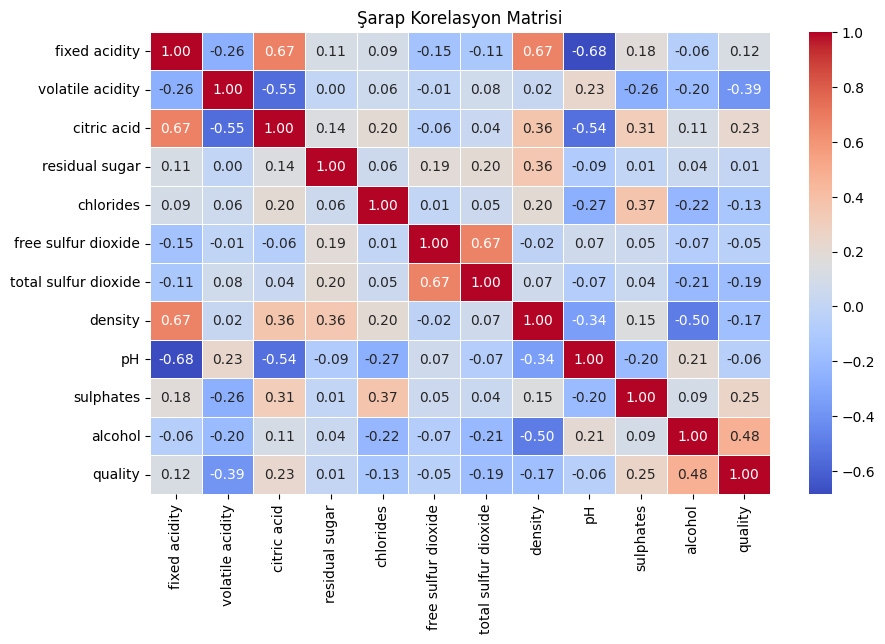

In [23]:
plt.figure(figsize=(10,6))
sb.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Şarap Korelasyon Matrisi")
plt.show()

quality(kalite) ve alcohol korelasyonuna baktğımızda alkol miktarının kalite ile olan ilişkisini yorumluyacak olursam
0.48 bir korelasyon ile orta derece bir ilişkisi var.Alkol oranının kalite üzerindeki etkisi olduğu söylenebilir ancak başka faktörler de kaliteyi etkileyebilir.

In [30]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [55]:
X = df.drop(columns=["quality"])
y = df["quality"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae, mse
coef_df = pd.DataFrame(model.coef_, X.columns, columns=["Katsayı"])
coef_df

,Katsayı
fixed acidity,0.023085
volatile acidity,-1.001304
citric acid,-0.140821
residual sugar,0.006564
chlorides,-1.806503
free sulfur dioxide,0.005627
total sulfur dioxide,-0.003644
density,-10.351594
pH,-0.393688
sulphates,0.841172


Doğrusal regresyon modelinde şarapların kimyasal bileşenleri ile kaliteleri arasındaki ilişkiyi inceledim. Modelin katsayıları, her bir bileşenin şarap kalitesine olan etkisini gösteriyor ve modelin doğruluğu R-kare ile değerlendirdim r2 değeri yüksekse modeldeki tahminler gerçek değerlere yakın olduğunu gösteriyor.

In [62]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

Decision Tree MAE: 0.5169995904805598
Decision Tree MSE: 0.4379717420088509
Decision Tree R²: 0.329812065606086


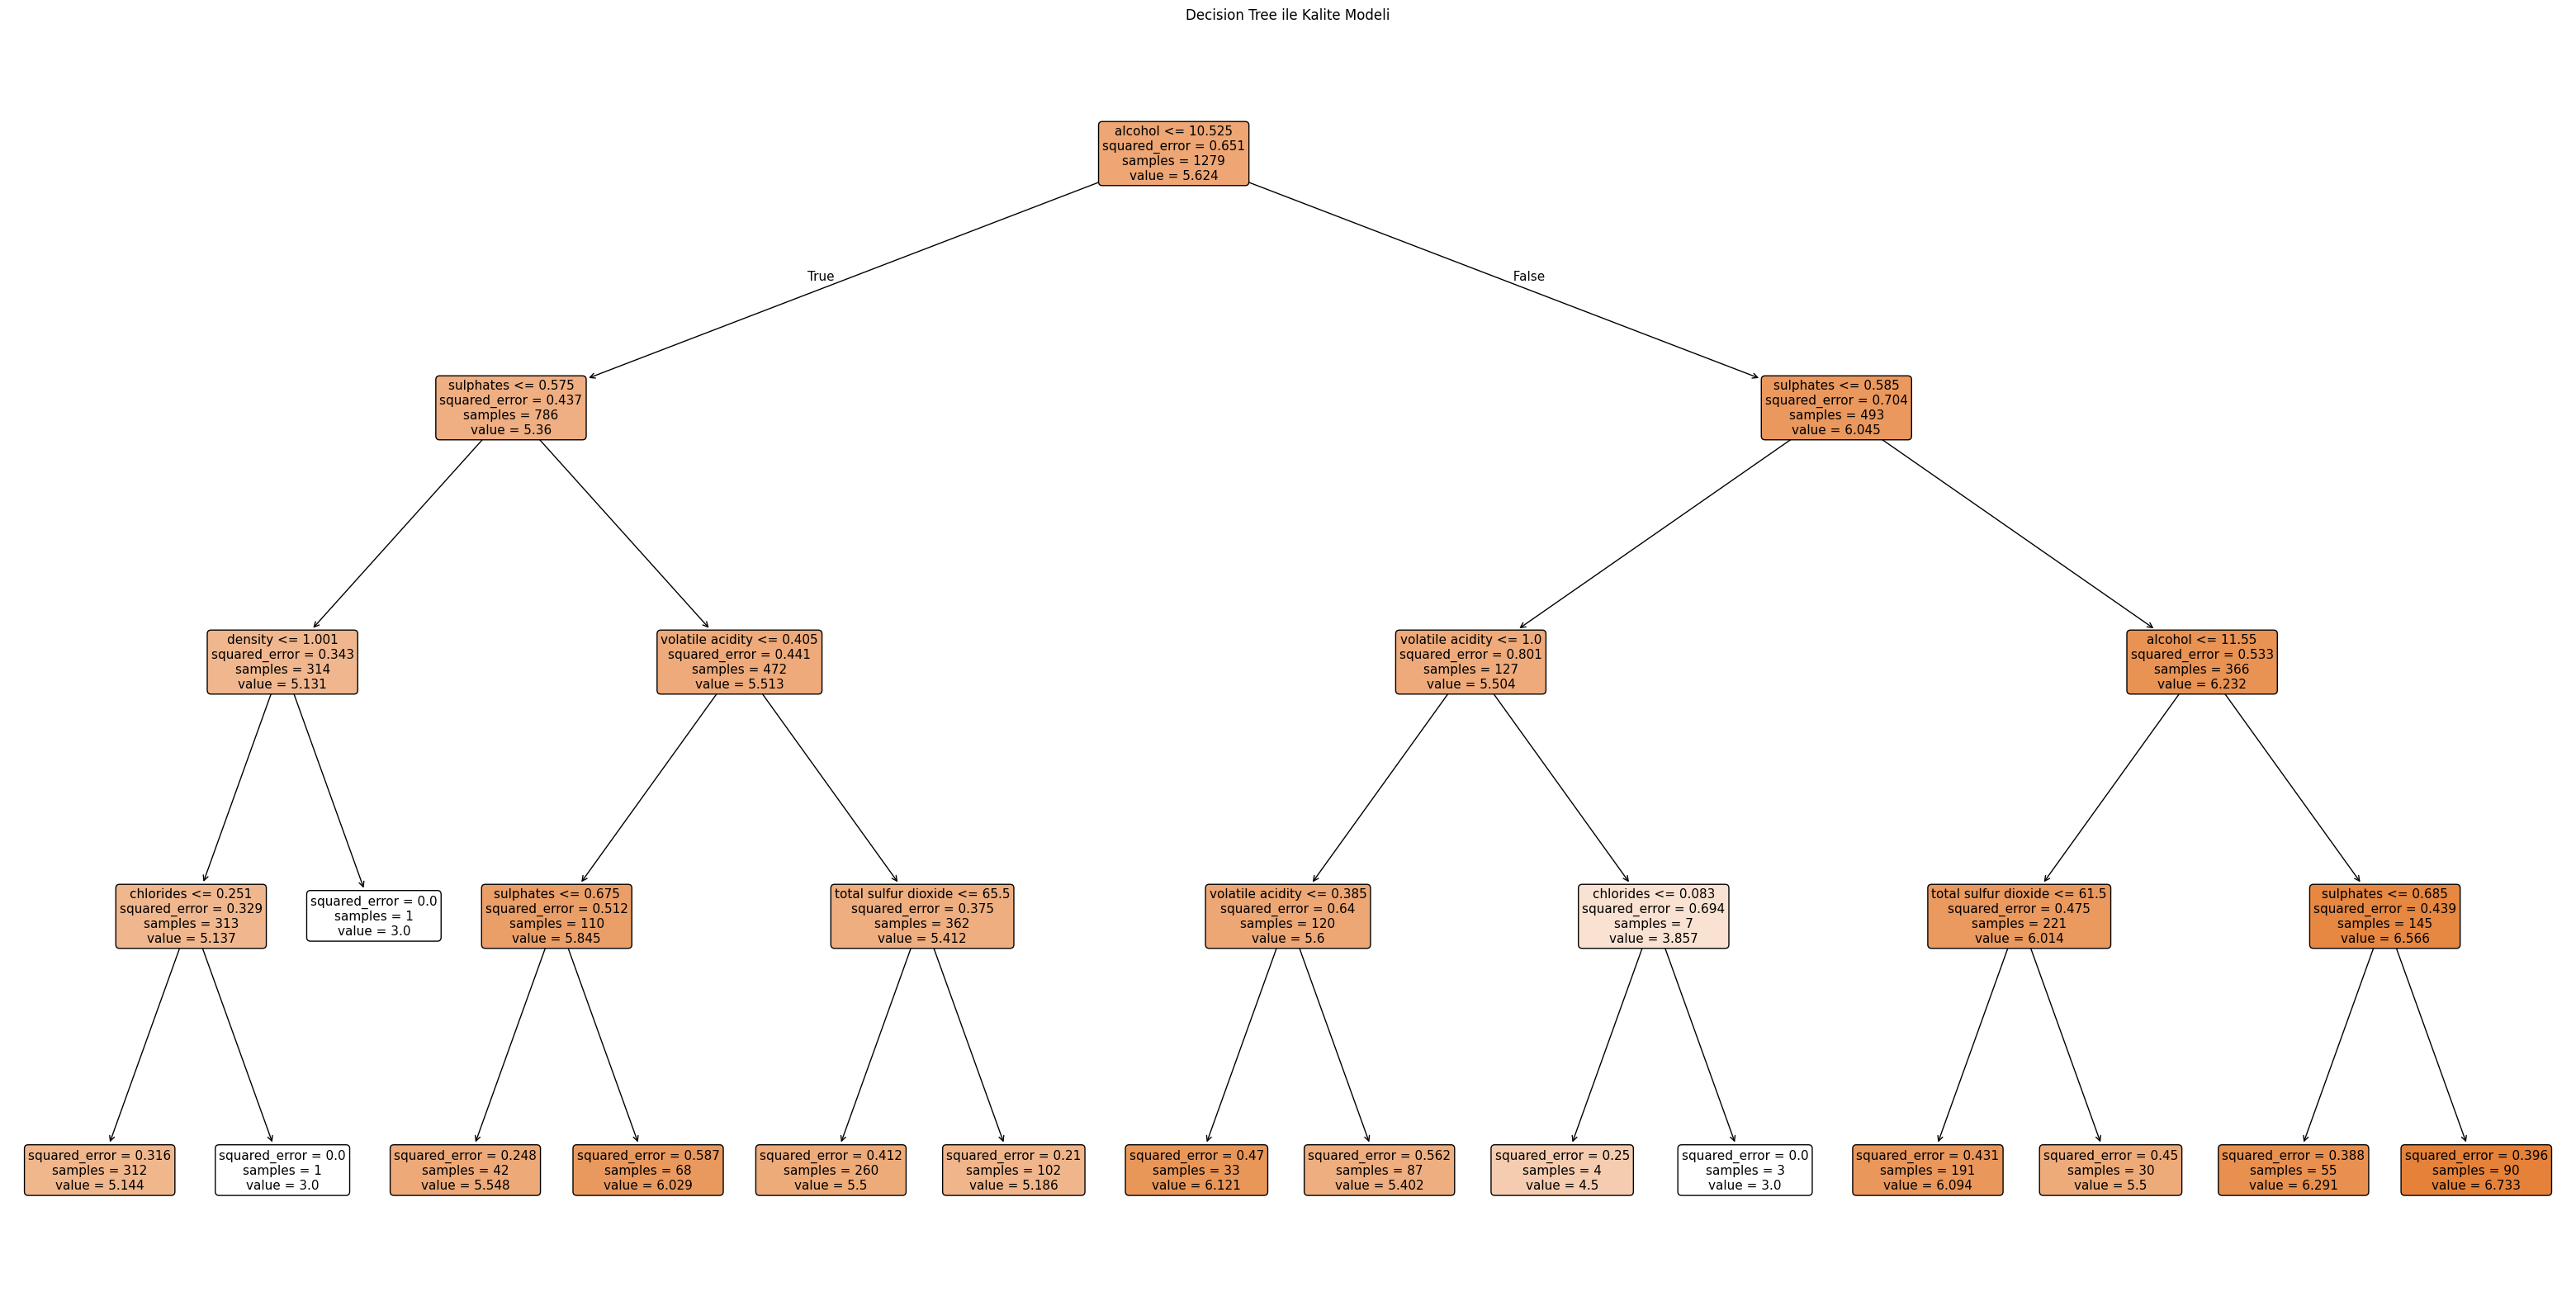

In [71]:
decision_tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
decision_tree_model.fit(X_train, y_train)

y_pred_tree = decision_tree_model.predict(X_test)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree MAE: {mae_tree}")
print(f"Decision Tree MSE: {mse_tree}")
print(f"Decision Tree R²: {r2_tree}")

plt.figure(figsize=(40, 20))
plot_tree(decision_tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree ile Kalite Modeli")
plt.show()

Random Forest MAE: 0.4224375
Random Forest MSE: 0.30123812499999997
Random Forest R²: 0.5390429623873638


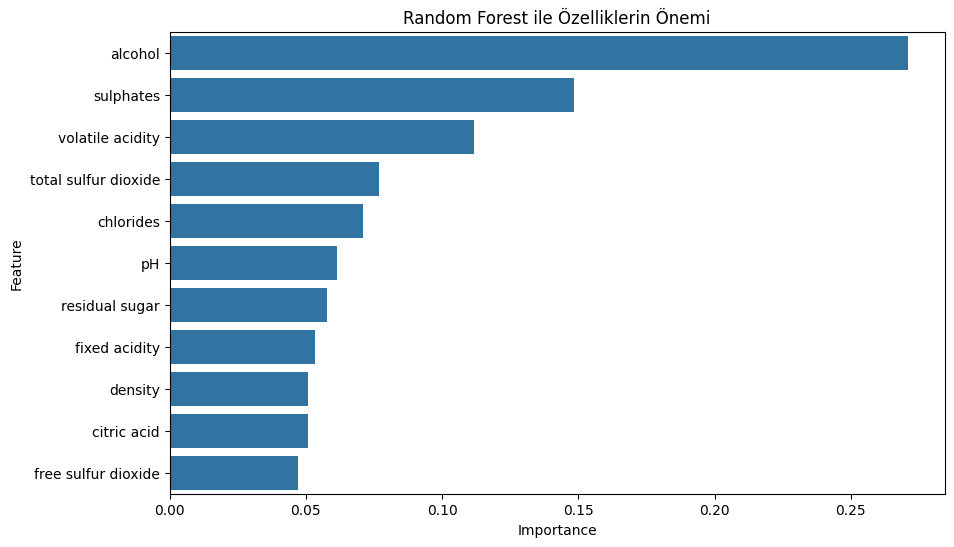

In [72]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R²: {r2_rf}")

feature_importance = random_forest_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sb.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Random Forest ile Özelliklerin Önemi")
plt.show()


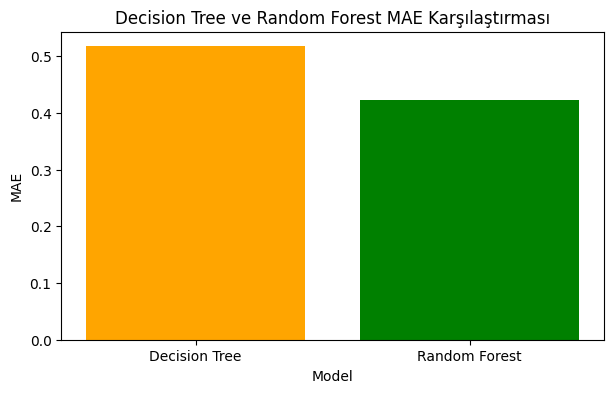

In [75]:
mae_values = [mae_tree, mae_rf]
models = ['Decision Tree', 'Random Forest']

plt.figure(figsize=(7, 4))
plt.bar(models, mae_values, color=['orange', 'green'])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Decision Tree ve Random Forest MAE Karşılaştırması')
plt.show()

MAE ile karşılaştırma yapılarak modelin doğrulu konusunda genel fikir edinmiş oldum ve gördüğüm üzere andom forest modelinin decision tree modeline göre daha düşük bir hata oranına sahip olduğu gözlemleniyor. Ancak, her iki modelin de hataları, göreceli olarak çok büyük değil. Yani, her iki model de iyi tahminler yapıyor random forest biraz daha doğru sonuçlar veriyor.